# Primer Punto:

(20%) Implemente una función que dado un vector X y un número de vecinos K, sea capaz de calcular la distancia euclidiana del vector a todos los puntos del espacio de representación y retornar al usuario la posición de los N puntos más cercanos. (Haga uso de la base de datos iris para corroborar el funcionamiento de su función.)

Con la línea de código from main import * se pueden usar todos los recursos existentes en el archivo de main.py en el modelo del archivo Laboratorio_I.ipynb; Todo lo anterior con la finalidad de tener un código más legible y mejor gestión de la memoria.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from main import *

#Importar la base de datos:
iris_ds = datasets.load_iris()

#Reconocimiento de la base de datos:
print(f'Tamaño de la matriz {iris_ds.data.shape},'
      f' Categorías {iris_ds.target_names},'
      f' Atributos {iris_ds.feature_names}')

#Conversión a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris_ds['data'], iris_ds['target']],
                       columns=iris_ds['feature_names']+['Especies'])
iris_df.head(10)

Tamaño de la matriz (150, 4), Categorías ['setosa' 'versicolor' 'virginica'], Atributos ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especies
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Para el contexto de esta base de datos es necesario entender que el sepal o sépalo de una flor es la cápsula inicial que protege los demás elementos de la flor antes de que esta florezca, del mismo modo también está el pétalo, que forma la corola de la flor (las hojas con colores bonitos y llamativos característicos de cualquier flor).

![Partes de una flor (las que nos interesan)](https://i.ytimg.com/vi/GYBko-B13hY/maxresdefault.jpg)

# Exploración inicial de datos:
Para esta sección lo que se hace es hacer una revisión tanto gráfica como analítica de los elementos que están relacionados en la base de datos

Para el scope de este primer punto solo necesitaremos 2 características del DataFrame, se elegirán Virginica y Versicolor

# Exploración inicial de datos:
Para esta sección lo que se hace es hacer una revisión tanto gráfica como analítica de los elementos que están relacionados en la base de datos

In [3]:
#Descripción de los datos en iris_df:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especies
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


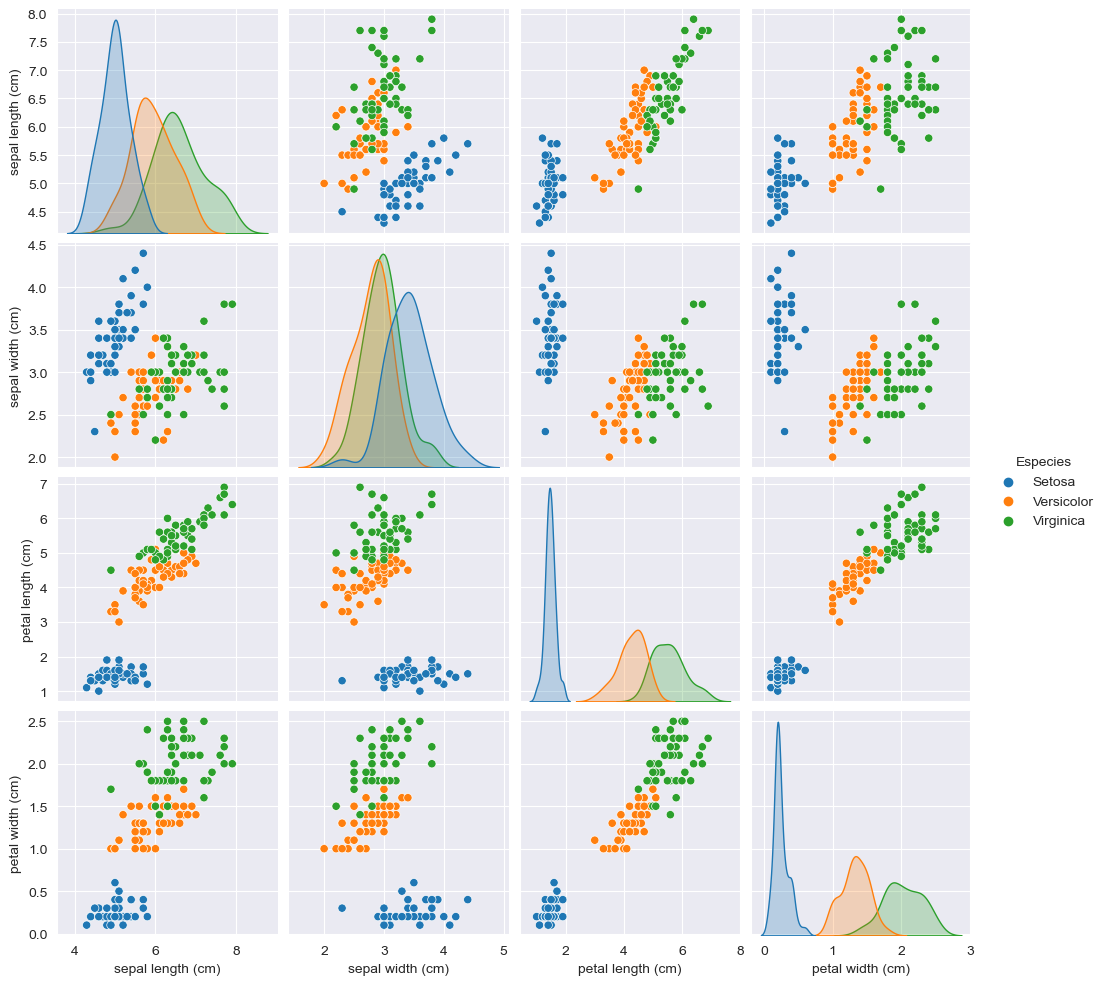

In [4]:
#Graficar los datos con seaborn:
spec = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
sns.pairplot(iris_df.replace({'Especies':spec}), hue='Especies')
plt.show()

Para el scope de este primer punto solo necesitaremos 2 características del DataFrame, se elegirán Virginica y Versicolor

In [6]:
caract = ['petal length (cm)', 'petal width (cm)']
X = iris_df.loc[:, caract]
y = iris_df.loc[:, ['Especies']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Normalizar
scaler = preprocessing.Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
K = int(input('Digite el número de vecinos que quiere calcular: '))
distancias_knn(X_train, X_test, K)

Valor del punto de prueba: "petal length (cm): 0.9544799780350297" "petal width (cm): 0.2982749931359468" Sus vecinos más cercanos son (ID | Distancia entre los puntos)         dist
40  0.001116
20  0.002714
97  0.004161
Valor del punto de prueba: "petal length (cm): 0.9507298394814787" "petal width (cm): 0.310020599830917" Sus vecinos más cercanos son (ID | Distancia entre los puntos)         dist
38  0.000983
50  0.000983
31  0.001071
Valor del punto de prueba: "petal length (cm): 0.9805806756909201" "petal width (cm): 0.19611613513818402" Sus vecinos más cercanos son (ID | Distancia entre los puntos)             dist
4   1.110223e-16
22  1.010062e-02
89  1.369767e-02
Valor del punto de prueba: "petal length (cm): 0.9899494936611666" "petal width (cm): 0.14142135623730953" Sus vecinos más cercanos son (ID | Distancia entre los puntos)      dist
1     0.0
101   0.0
46    0.0
Valor del punto de prueba: "petal length (cm): 0.9570244044334736" "petal width (cm): 0.2900073952828708" Sus v

# Segundo punto

(10%) Desarrolle un algoritmo que cree dos vectores aleatorios de tamaño N (ingresado por el usuario),
donde todas sus posiciones sean de “0” o “1”. El algoritmo debe dar un resultado final que indique el
número de posiciones en el que fueron diferentes ambos vectores.

In [8]:
hamming_funct() # --> Función guardada en el archivo main.py

Vector 1: [0 0 0 1 0 0 1 1 0 0] 
Vector 2: [0 0 1 0 0 0 0 0 1 1] 
Posiciones en las que fueron diferentes: 6.0


# Tercer Punto

(60%) A partir de la base de datos Boston de Sklearn “data = datasets.load_boston()”

a. Describa como está compuesta la base de datos y para qué tipo de problema de los vistos en clase
(Clasificación y regresión) está diseñada.

b. Normalice los datos en caso de que lo considere necesario. Justifique

c. Hacer un análisis de las características por observación, graficando las variables con respecto target, con el fin de seleccionar únicamente 3 características para el algoritmo de machine a aplicar. (Explique su selección).

d. Aplique un algoritmo de cross-validation con el fin encontrar el mejor modelo para los datos, teniendo en cuenta lo anterior, guarde los modelos en cada interacción para que pueda reportar los parámetros del mejor modelo. Reporte la media de los scores obtenidos, el mejor modelo de los evaluados y los parámetros del mejor modelo (pesos y bias)

e. Varíe el número de Folds y grafique el promedio del score en cada una de las pruebas con respecto a estos. ¿Qué número de Folds es el más adecuado para esta aplicación?

f. ¿Cómo piensas que puede mejorar el rendimiento del modelo?

In [25]:
boston = datasets.load_boston()
print(boston.DESCR)
Boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
X=pd.DataFrame(boston['data'], columns=boston.feature_names)
X['MEDV']=boston['target']
Y = X['MEDV'].copy()
del X['MEDV']
data = pd.concat((Y, X), axis=1)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

La base de datos está compuesta por 506 muestras, con 13 atributos entre categóricos y numéricos, y el target que es el valor medio de la muestra.
Los atributos:

- CRIM: Porcentaje de crimen per capita en la ciudad.
- ZN: Proporción de las zonas residenciales ubicadas en lotes de más de 25000 pies cuadrados.
- INDUS: Proporción de acres (43560 pies cuadrados) relacionados a negocios no minoristas en la ciudad.
- CHAS: Variable Charles River Dummy, determina sí el domicilio en cuestión es cercano al río Charles River o no.
- NOX: Concentración de óxidos nítricos (smog y calidad del aire, expresado en partes por cada 10 millones)
- RM: Promedio de habitaciones por vivienda
- AGE: Proporción de ocupación de las viviendas por unidad desde 1940
- DIS: Distancias ponderadas hacía los 5 centros de empleo de Boston.
- RAD: Índice de accesibilidad a carreteras cercanas.
- TAX: Tasa de impuesto a la propiedad total por cada $10.000
- PTRATIO: Proporción estudiantes-maestro en la ciudad
- B: 1000(Bk-0.63)^2 dónde Bk es la proporción de personas de tez negra en la ciudad.
- LSTAT: Porcentaje de la población de estrato socioeconomico bajo.
- MEDV: Valor medio de casas ocupadas en miles de dólares.

Adicionalmente, la base de datos Boston reporta la no presencia de atributos perdidos o NaN-Null.

Aunque la base de datos Boston sea mayormente utilizada para regresión y predicción de valores de casas según la relación de sus características, también puede ser utilizada para la clasificación de residencias sí se agrupan los rangos de precios entre "Bajo Costo", "Medio Costo", "Alto Costo", todo dependiendo del scope u objetivo del estudio.

El diseño por defecto de la base de datos está estructurado para realizar una regresión lineal.


Para revisar sí la base de datos debe ser normalizada o no, se graficaran los datos con ayuda de seaborn

In [10]:
data.head(10)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


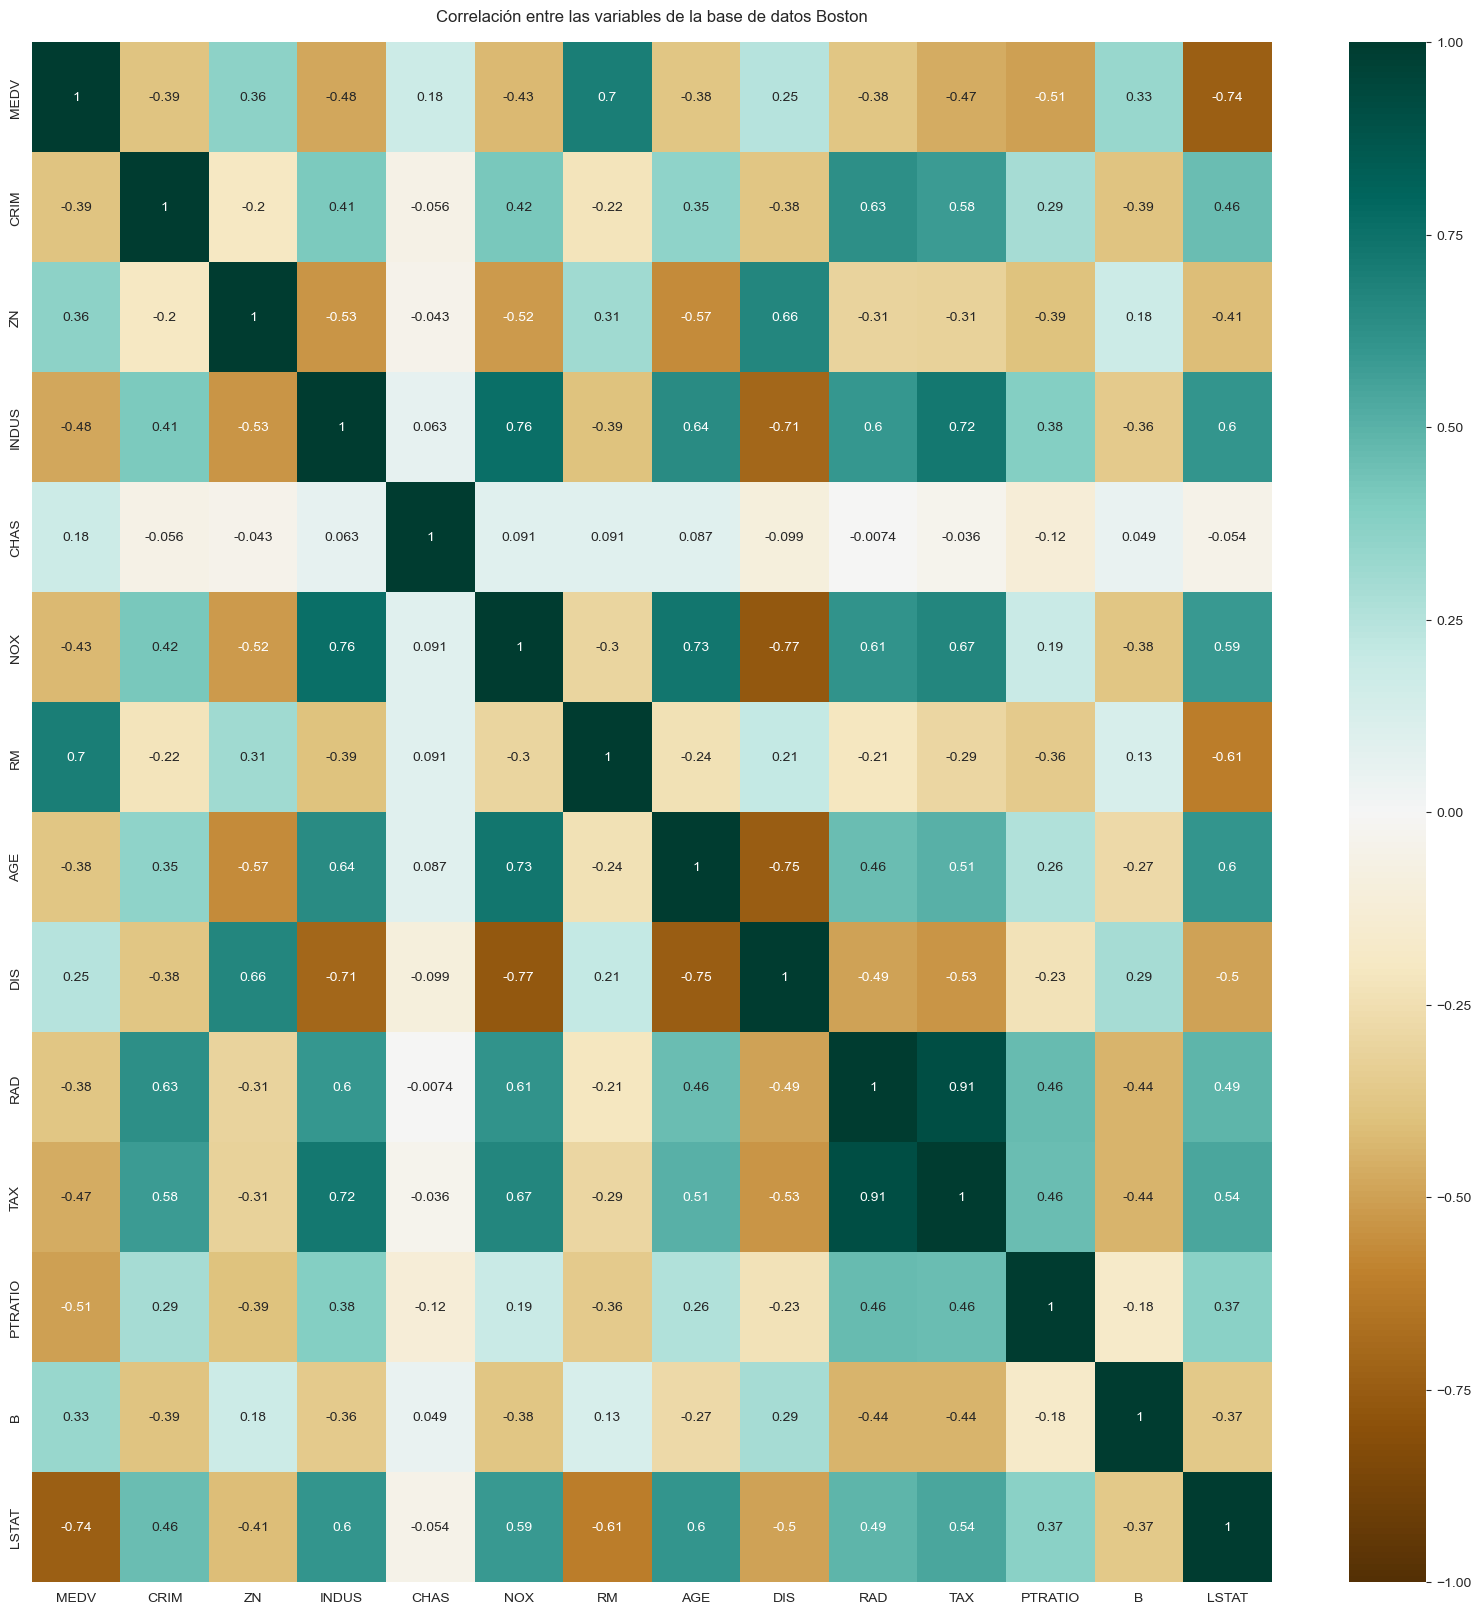

In [11]:
plt.figure(figsize=(20,20))
correlation_plot = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
correlation_plot.set_title('Correlación entre las variables de la base de datos Boston', fontdict={'fontsize': 12}, pad=15)
plt.show()

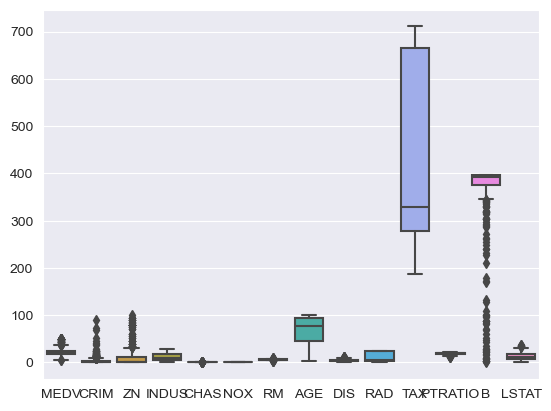

In [12]:
sns.boxplot(data=data)
plt.show()

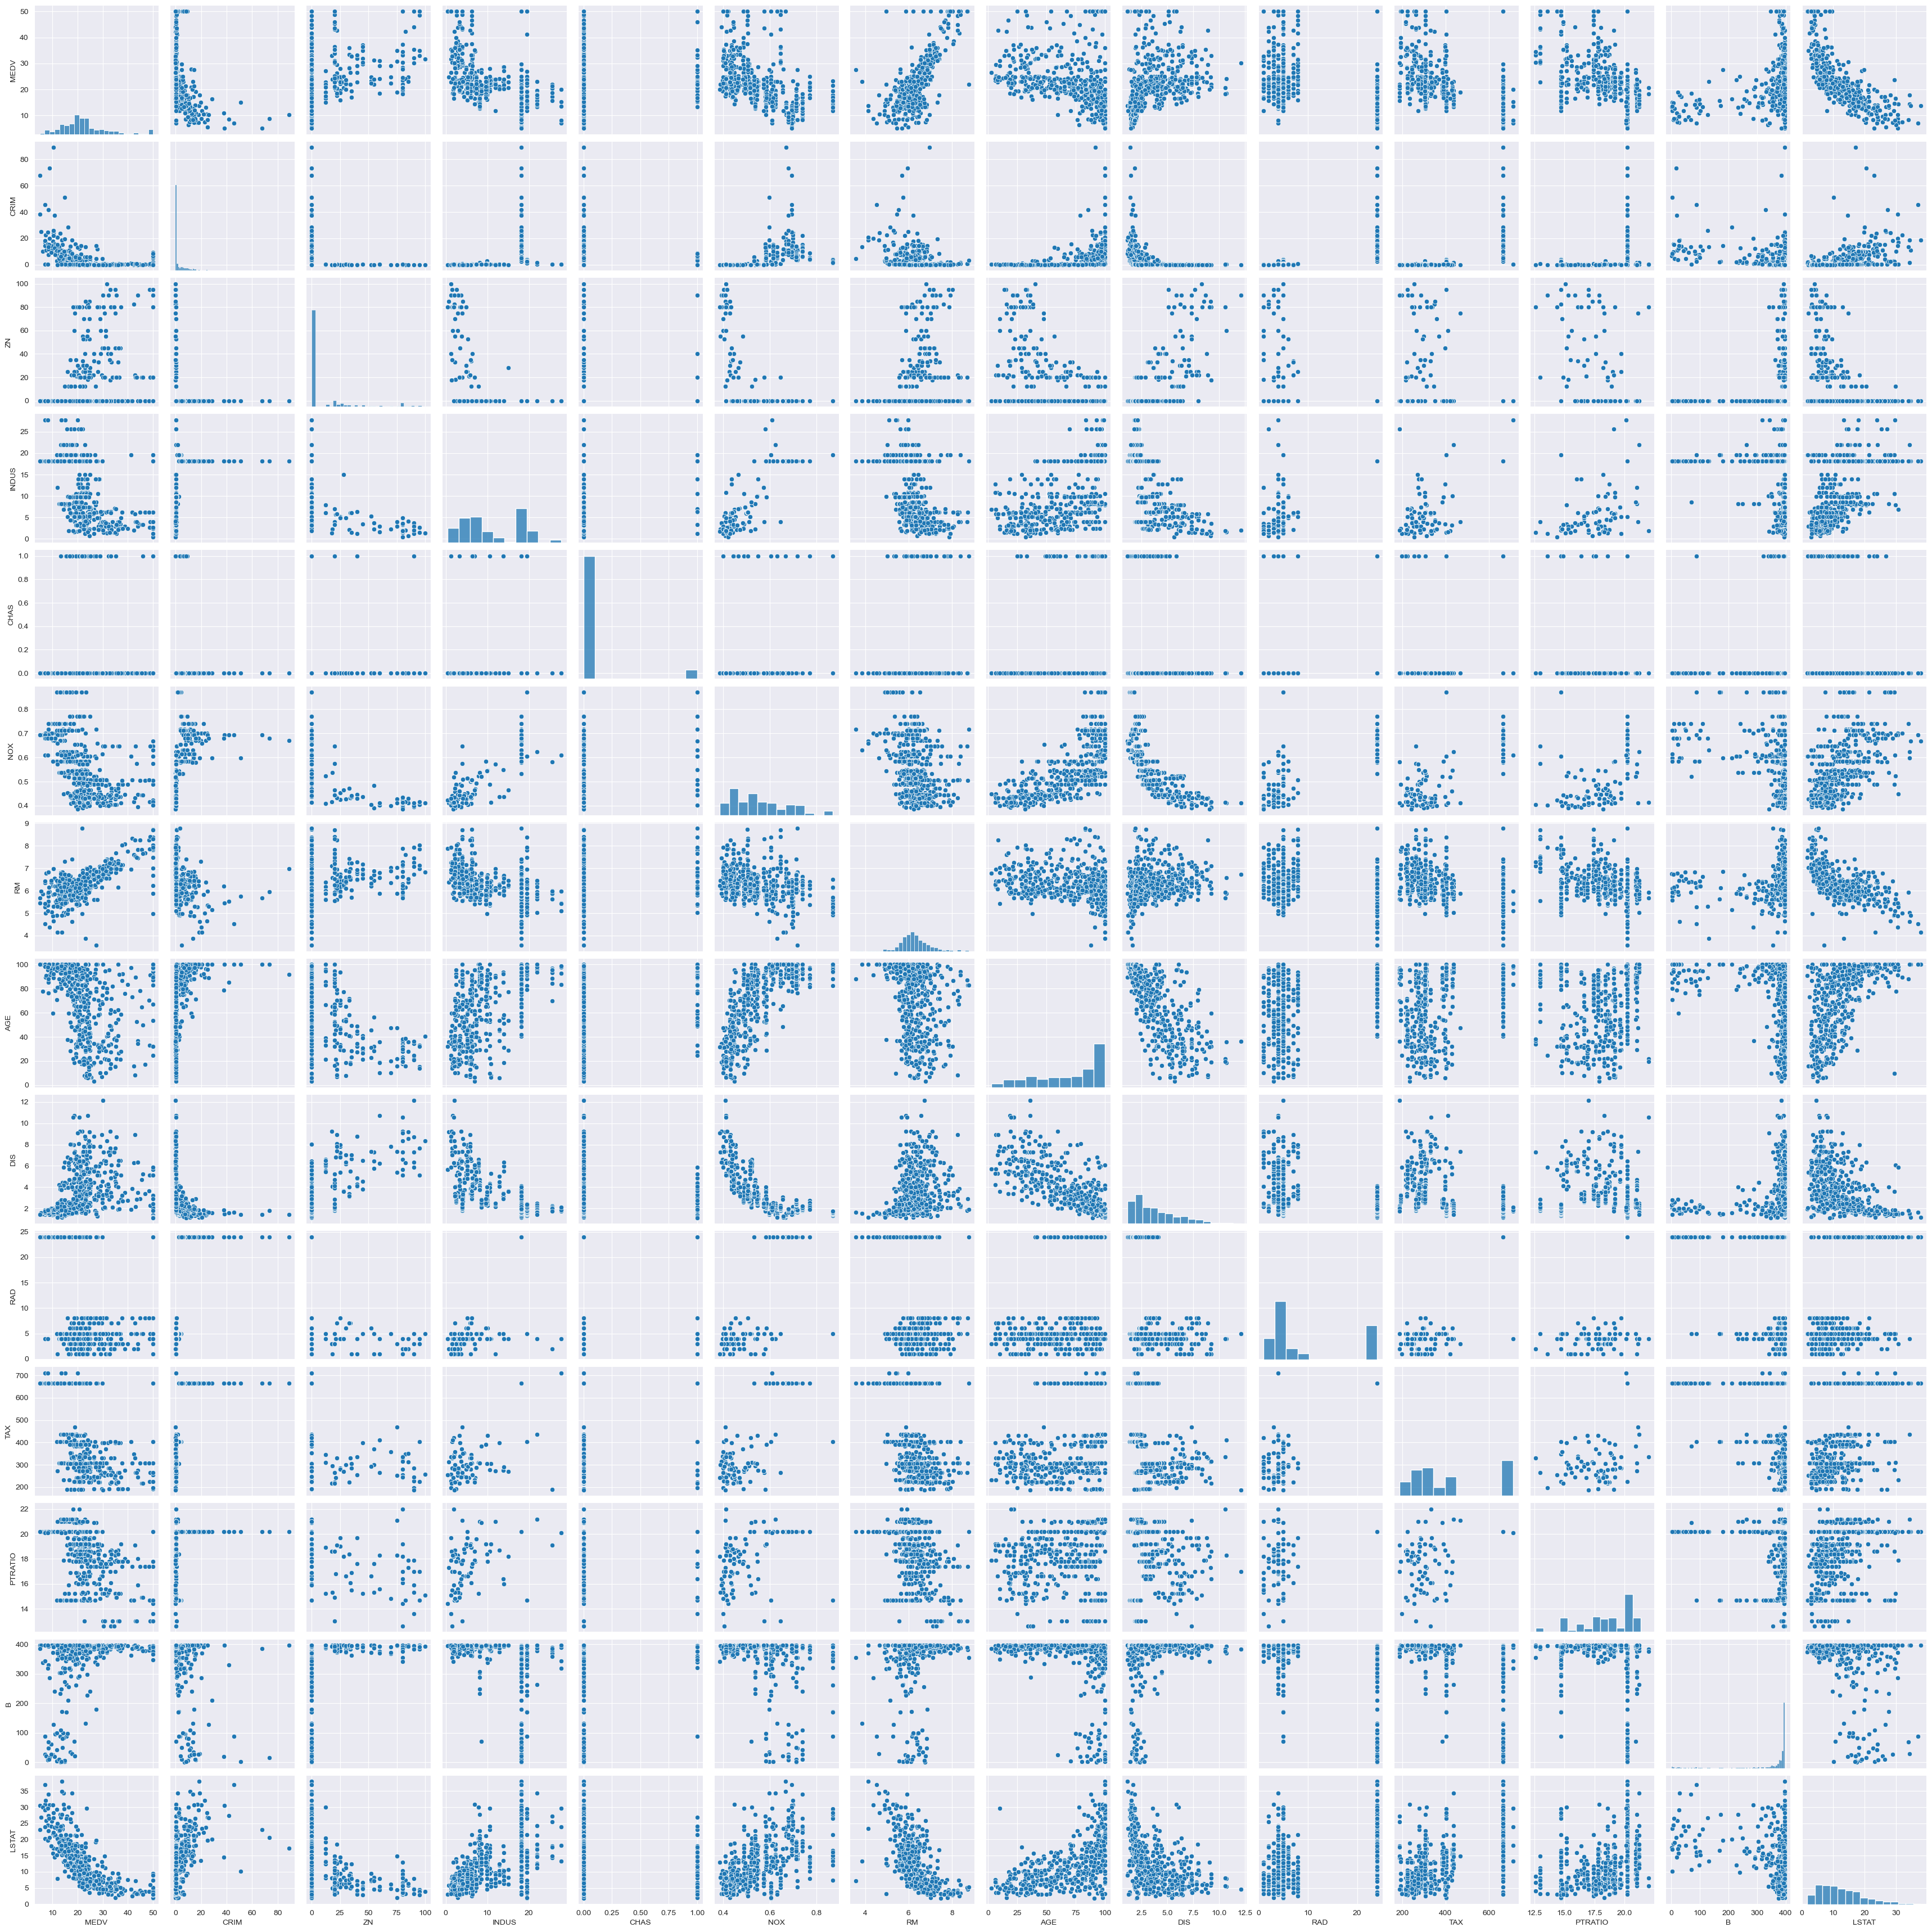

In [13]:
sns.pairplot(data=data)
plt.show()

Como se puede evidenciar gracias a las gráficas anteriores, la distribución de los datos para este conjunto preciso de Boston es muy redundante, por lo que el modelo no sería realmente viable frente a datos nuevos que ingresen al estudio, generando un sesgo; También afectaría a la medida final de R2 o Accuracy. Se optará entonces por normalizar la base de datos y comparar cómo se comporta la información.

In [14]:
"""Se repite el proceso inicial de división de data pero sin concatenarlas"""
X=pd.DataFrame(boston['data'], columns=boston.feature_names)
X['MEDV']=boston['target']
Y = X['MEDV'].copy()
del X['MEDV']
data = pd.concat((Y, X), axis=1)

transformer = MinMaxScaler()
X_norm = transformer.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

"""Se vuelve a concatenar la información"""
data_norm = pd.concat((Y, X_norm), axis=1)

Comparación de la distribución de los datos normalizados con los datos originales.

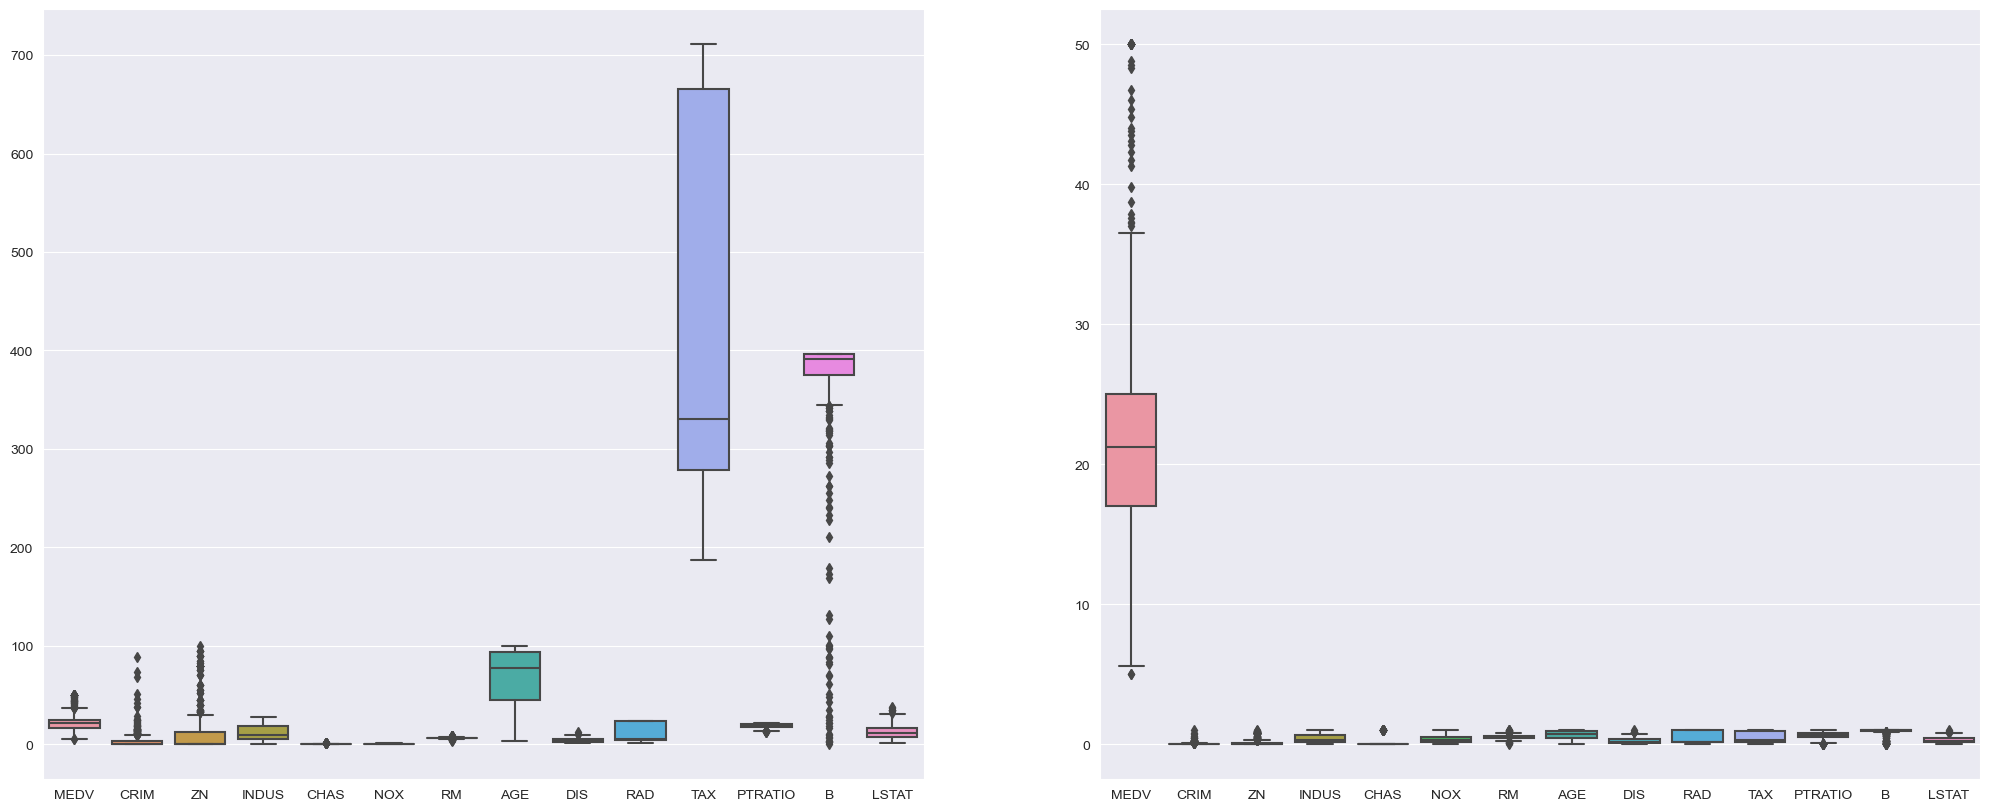

In [15]:
plt.figure(figsize=(25, 10))
plt.subplot(1,2,1)
sns.boxplot(data=data)
plt.subplot(1,2,2)
sns.boxplot(data=data_norm)
plt.show()

De acuerdo a la gráfica *pairplot* las relaciones de las características MEDV vs: RM (Correlación positiva), LSTAT (Correlación negativa), AGE (Distribución uniforme de datos) son las que nos arrojan una mayor afinidad con la variable objetivo MEDV, pero comparando con la gráfica de correlación se puede definir claramente que LSTAT y PTRATIO son las variables con mayor correlación negativa y la variable RM la que tiene mayor correlación positiva; Se optará por elegir como variables de interés RM, LSTAT y PTRATIO para el modelo.

In [16]:
X_flt = X_norm.loc[:,['RM', 'LSTAT', 'PTRATIO']]
data_flt = pd.concat((Y, X_flt), axis=1)
data_flt.head()

,MEDV,RM,LSTAT,PTRATIO
0,24.0,0.577505,0.089680,0.287234
1,21.6,0.547998,0.204470,0.553191
2,34.7,0.694386,0.063466,0.553191
3,33.4,0.658555,0.033389,0.648936
4,36.2,0.687105,0.099338,0.648936


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_flt, Y, test_size=0.3)
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)


X_train: (354, 3) y_train: (354,)
X_test: (152, 3) y_test: (152,)


Aplicamos el algoritmo de Cross-Validation:

           RM     LSTAT   PTRATIO
0    0.577505  0.089680  0.287234
3    0.658555  0.033389  0.648936
5    0.549722  0.096026  0.648936
6    0.469630  0.295254  0.276596
14   0.485725  0.235375  0.893617
..        ...       ...       ...
500  0.472504  0.347682  0.702128
501  0.580954  0.219095  0.893617
502  0.490324  0.202815  0.893617
504  0.619467  0.131071  0.893617
505  0.473079  0.169702  0.893617

[169 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.6695025723860704
           RM     LSTAT   PTRATIO
1    0.547998  0.204470  0.553191
2    0.694386  0.063466  0.553191
7    0.500287  0.480684  0.276596
11   0.469055  0.318433  0.276596
13   0.457559  0.180188  0.893617
..        ...       ...       ...
490  0.293543  0.771247  0.797872
491  0.464074  0.450883  0.797872
492  0.464074  0.320640  0.797872
495  0.404100  0.437914  0.702128
497  0.427860  0.341336  0.702128

[169 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.7058536579556929
      

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


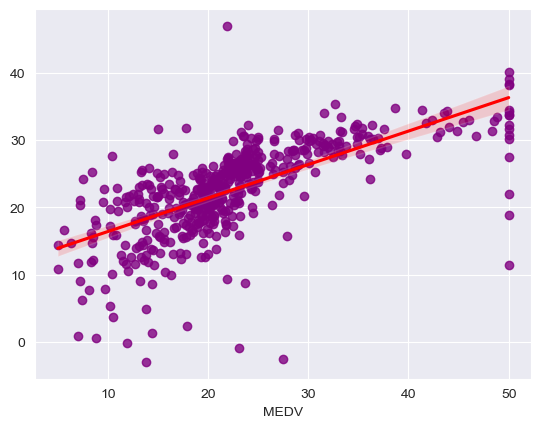

In [64]:
n_spl = int(input('¿Cuántos splits aplicará al modelo?')) #n_splits --> Número de veces que se partirá el set de datos
k_fold = KFold(n_spl, shuffle=True, random_state=24) #El shuffle va true para que aleatorice la toma de segmentos en los datos de entrenamiento
fold_n = 1 #Fold number
model = linear_model.LinearRegression()
sco = np.zeros(n_spl) #Score vector
for train, test in k_fold.split(X_flt):
    X_train, X_test = X_flt.iloc[train], X_flt.iloc[test]
    print(X_test)
    y_train, y_test = Y[train], Y[test]

    #Entrenar el modelo
    model.fit(X_test, y_test)
    print(f'Precisión para el fold {fold_n} en el set de prueba: {model.score(X_test, y_test)}')
    sco[fold_n-1] = model.score(X_test, y_test)
    fold_n += 1
sco_max = np.where(sco==np.amax(sco))
print(f'Media del score obtenido para {n_spl} splits del set de datos: {np.mean(sco)},'
      f'\nLos scores obtenidos fueron: {sco}, donde el más alto fue: {np.amax(sco)},'
      f'\nCorrespondiente a la posición: {sco_max[0]}')
scores = cross_val_score(model, X_flt, Y, cv=3)
pred = cross_val_predict(model, X_flt, Y, cv=3)
sns.regplot(Y, pred, scatter_kws={"color": "purple"}, line_kws={"color": "red"})
plt.show()

           RM     LSTAT   PTRATIO
0    0.577505  0.089680  0.287234
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
6    0.469630  0.295254  0.276596
9    0.468097  0.424117  0.276596
..        ...       ...       ...
498  0.470971  0.308775  0.702128
501  0.580954  0.219095  0.893617
502  0.490324  0.202815  0.893617
503  0.654340  0.107892  0.893617
505  0.473079  0.169702  0.893617

[253 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.6882346912099274
           RM     LSTAT   PTRATIO
1    0.547998  0.204470  0.553191
2    0.694386  0.063466  0.553191
3    0.658555  0.033389  0.648936
7    0.500287  0.480684  0.276596
8    0.396628  0.778146  0.276596
..        ...       ...       ...
495  0.404100  0.437914  0.702128
496  0.350450  0.535596  0.702128
499  0.384748  0.368929  0.702128
500  0.472504  0.347682  0.702128
504  0.619467  0.131071  0.893617

[253 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.6721519850451099
Media 

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


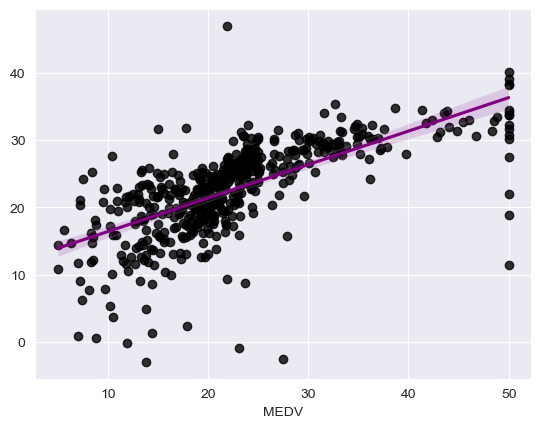

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
6    0.469630  0.295254  0.276596
11   0.469055  0.318433  0.276596
13   0.457559  0.180188  0.893617
..        ...       ...       ...
497  0.427860  0.341336  0.702128
498  0.470971  0.308775  0.702128
501  0.580954  0.219095  0.893617
502  0.490324  0.202815  0.893617
503  0.654340  0.107892  0.893617

[169 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.7196775476610794
           RM     LSTAT   PTRATIO
0    0.577505  0.089680  0.287234
8    0.396628  0.778146  0.276596
9    0.468097  0.424117  0.276596
12   0.446062  0.385762  0.276596
14   0.485725  0.235375  0.893617
..        ...       ...       ...
488  0.362713  0.450607  0.797872
493  0.411190  0.283664  0.702128
495  0.404100  0.437914  0.702128
504  0.619467  0.131071  0.893617
505  0.473079  0.169702  0.893617

[169 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.650860402511564
       

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


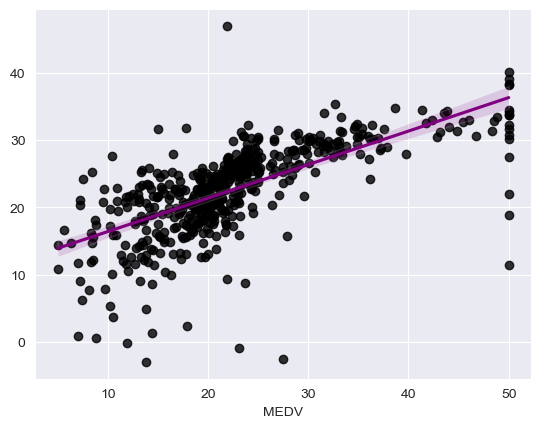

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
6    0.469630  0.295254  0.276596
11   0.469055  0.318433  0.276596
17   0.465415  0.357064  0.893617
..        ...       ...       ...
494  0.453152  0.327263  0.702128
497  0.427860  0.341336  0.702128
498  0.470971  0.308775  0.702128
501  0.580954  0.219095  0.893617
503  0.654340  0.107892  0.893617

[127 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.7659404279780685
           RM     LSTAT   PTRATIO
0    0.577505  0.089680  0.287234
9    0.468097  0.424117  0.276596
12   0.446062  0.385762  0.276596
13   0.457559  0.180188  0.893617
14   0.485725  0.235375  0.893617
..        ...       ...       ...
485  0.527112  0.244205  0.808511
488  0.362713  0.450607  0.797872
493  0.411190  0.283664  0.702128
502  0.490324  0.202815  0.893617
505  0.473079  0.169702  0.893617

[127 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.6246072462915042
      

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


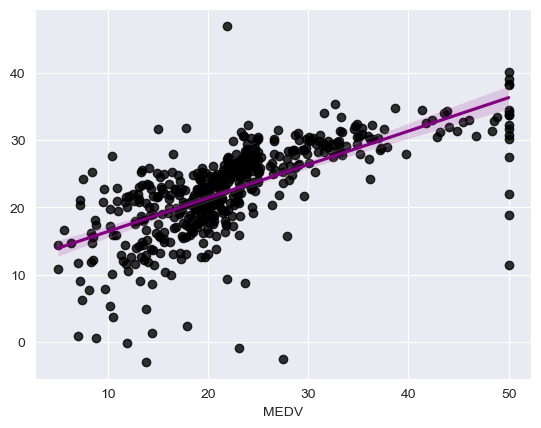

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
6    0.469630  0.295254  0.276596
11   0.469055  0.318433  0.276596
17   0.465415  0.357064  0.893617
..        ...       ...       ...
491  0.464074  0.450883  0.797872
494  0.453152  0.327263  0.702128
497  0.427860  0.341336  0.702128
501  0.580954  0.219095  0.893617
503  0.654340  0.107892  0.893617

[102 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.7341560807663531
           RM     LSTAT   PTRATIO
12   0.446062  0.385762  0.276596
13   0.457559  0.180188  0.893617
18   0.363096  0.274834  0.893617
23   0.431500  0.500828  0.893617
27   0.476336  0.429084  0.893617
..        ...       ...       ...
467  0.467906  0.540563  0.808511
469  0.412340  0.359547  0.808511
498  0.470971  0.308775  0.702128
502  0.490324  0.202815  0.893617
505  0.473079  0.169702  0.893617

[101 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.620689716506091
       

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


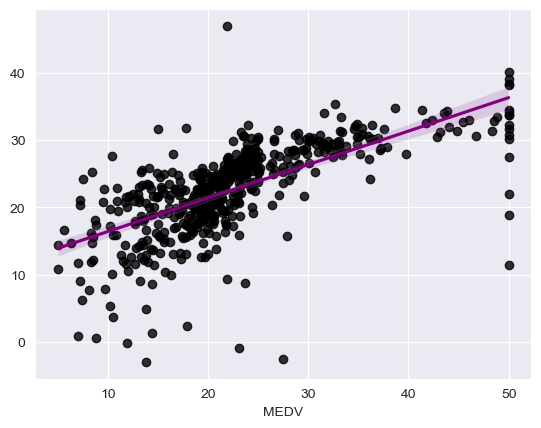

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
17   0.465415  0.357064  0.893617
29   0.596474  0.282837  0.893617
31   0.481127  0.312086  0.893617
..        ...       ...       ...
481  0.611037  0.165839  0.808511
483  0.421728  0.239790  0.808511
486  0.489174  0.365618  0.808511
490  0.293543  0.771247  0.797872
494  0.453152  0.327263  0.702128

[85 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.7096539772496304
           RM     LSTAT   PTRATIO
6    0.469630  0.295254  0.276596
11   0.469055  0.318433  0.276596
13   0.457559  0.180188  0.893617
18   0.363096  0.274834  0.893617
23   0.431500  0.500828  0.893617
..        ...       ...       ...
497  0.427860  0.341336  0.702128
498  0.470971  0.308775  0.702128
501  0.580954  0.219095  0.893617
502  0.490324  0.202815  0.893617
503  0.654340  0.107892  0.893617

[85 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.7540005059217292
        

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


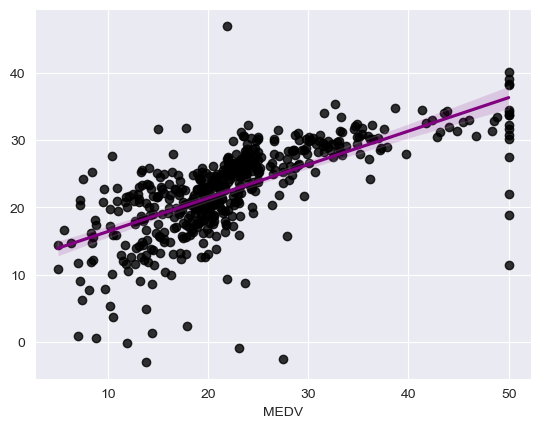

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
17   0.465415  0.357064  0.893617
31   0.481127  0.312086  0.893617
34   0.485725  0.513521  0.893617
..        ...       ...       ...
478  0.502778  0.449779  0.808511
481  0.611037  0.165839  0.808511
486  0.489174  0.365618  0.808511
490  0.293543  0.771247  0.797872
494  0.453152  0.327263  0.702128

[73 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.7394134747125263
           RM     LSTAT   PTRATIO
6    0.469630  0.295254  0.276596
11   0.469055  0.318433  0.276596
18   0.363096  0.274834  0.893617
29   0.596474  0.282837  0.893617
40   0.663537  0.006898  0.606383
..        ...       ...       ...
497  0.427860  0.341336  0.702128
498  0.470971  0.308775  0.702128
501  0.580954  0.219095  0.893617
502  0.490324  0.202815  0.893617
503  0.654340  0.107892  0.893617

[73 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.7938270732736699
        

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


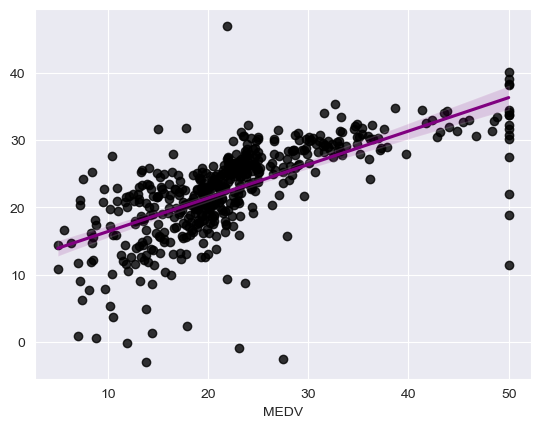

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
17   0.465415  0.357064  0.893617
31   0.481127  0.312086  0.893617
34   0.485725  0.513521  0.893617
..        ...       ...       ...
478  0.502778  0.449779  0.808511
481  0.611037  0.165839  0.808511
486  0.489174  0.365618  0.808511
490  0.293543  0.771247  0.797872
494  0.453152  0.327263  0.702128

[64 rows x 3 columns]
Precisión para el fold 1 en el set de prueba: 0.8091998442109472
           RM     LSTAT   PTRATIO
6    0.469630  0.295254  0.276596
11   0.469055  0.318433  0.276596
18   0.363096  0.274834  0.893617
29   0.596474  0.282837  0.893617
40   0.663537  0.006898  0.606383
..        ...       ...       ...
497  0.427860  0.341336  0.702128
498  0.470971  0.308775  0.702128
501  0.580954  0.219095  0.893617
502  0.490324  0.202815  0.893617
503  0.654340  0.107892  0.893617

[64 rows x 3 columns]
Precisión para el fold 2 en el set de prueba: 0.7257793817384924
        

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


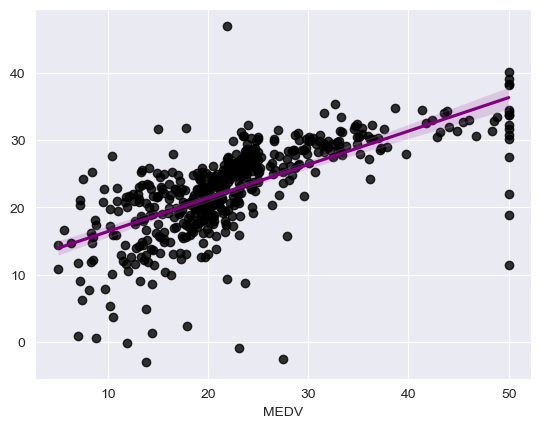

           RM     LSTAT   PTRATIO
4    0.687105  0.099338  0.648936
5    0.549722  0.096026  0.648936
31   0.481127  0.312086  0.893617
34   0.485725  0.513521  0.893617
47   0.473079  0.471026  0.563830
62   0.554704  0.137969  0.755319
65   0.522897  0.081126  0.372340
66   0.426518  0.234823  0.372340
67   0.443955  0.175773  0.670213
90   0.547231  0.195364  0.553191
102  0.544932  0.245585  0.882979
119  0.415788  0.327815  0.553191
132  0.538609  0.259106  0.914894
146  0.396053  0.411700  0.223404
147  0.261544  0.767108  0.223404
162  0.812608  0.005243  0.223404
165  0.486683  0.222958  0.223404
168  0.528454  0.258554  0.223404
201  0.498371  0.157285  0.223404
204  0.857061  0.031733  0.223404
218  0.457942  0.446744  0.404255
223  0.585744  0.161976  0.510638
225  0.989462  0.080022  0.510638
242  0.535926  0.261865  0.425532
245  0.391646  0.461645  0.691489
261  0.758574  0.152594  0.042553
292  0.588044  0.081954  0.702128
307  0.630006  0.160044  0.617021
312  0.471738 

C:\Users\gabca\anaconda3\envs\Python3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


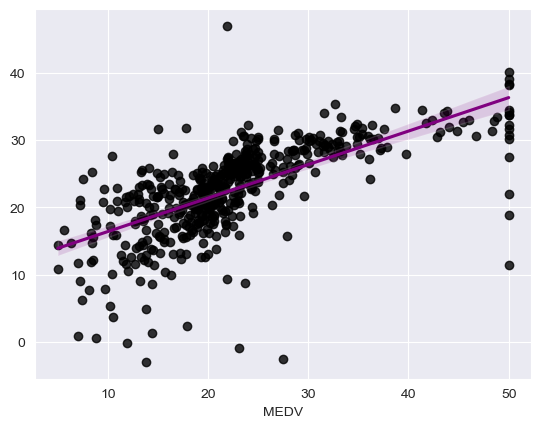

In [67]:
sco_fld_tot = np.zeros(8)
for i in range (2, 10):
    n_spl = i
    sco_fold = np.zeros(n_spl)
    k_fold = KFold(n_spl, shuffle=True, random_state=1)
    sco = np.zeros(n_spl) #Score vector
    fold_n = 1 #Fold number
    model = linear_model.LinearRegression()
    for train, test in k_fold.split(X_flt):
        X_train, X_test = X_flt.iloc[train], X_flt.iloc[test]
        print(X_test)
        y_train, y_test = Y[train], Y[test]

        #Entrenar el modelo
        model.fit(X_test, y_test)
        print(f'Precisión para el fold {fold_n} en el set de prueba: {model.score(X_test, y_test)}')
        sco[fold_n-1] = model.score(X_test, y_test)
        fold_n += 1
    sco_max = np.where(sco==np.amax(sco))
    print(f'Media del score obtenido para {n_spl} splits del set de datos: {np.mean(sco)},'
          f'\nLos scores obtenidos fueron: {sco}, donde el más alto fue: {np.amax(sco)},'
          f'\nCorrespondiente a la posición: {sco_max[0]}, el promedio de score por iteración fue: {np.mean(sco)}')
    scores = cross_val_score(model, X_flt, Y, cv=3)
    pred = cross_val_predict(model, X_flt, Y, cv=3)
    sns.regplot(Y, pred, scatter_kws={"color": "black"}, line_kws={"color": "purple"})
    plt.show()

Según los datos arrojados por el análisis anterior, el mejor número de folds para esta base de datos es de: 8 folds, debido a la siguiente información: -- Precisión para el fold 8 en el set de prueba: 0.7889313415903625
Media del score obtenido para 8 splits del set de datos: 0.700832955679432,
Los scores obtenidos fueron: [0.80919984 0.72577938 0.68430857 0.59651235 0.70226808 0.63714989
 0.66251418 0.78893134], donde el más alto fue: 0.8091998442109472,
Correspondiente a la posición: [0], el promedio de score por iteración fue: 0.700832955679432 --

El rendimiento del modelo puede mejorar significativamente sí no se usa una regresión lineal simple, se podría llegar a usar un modelo como el Kernel Ridge Regression, que no es solamente rápido, también eficiente al momento de realizar análisis de regresión no lineares.